# Word embeddings

<br>

[<img width=400 src="https://upload.wikimedia.org/wikipedia/commons/f/fe/Kernel_Machine.svg">](https://en.wikipedia.org/wiki/Word_embedding)

Word embeddings are algorithms that represent categorical data like words as vectors in a high dimensional space. 
These are machine learning methods that construct the embedding vectors using cooccurrence statistics, expressed in terms of simple language models. Embeddings reveal surprising semantic relations encoded in linear relationships. But they are "data hungry" and require large corpora of text or other coocurrence data to construct good embeddings. 

In this notebook we will explore some of the basics of word embeddings, playing around with two types of embeddings constructed on large amounts of text extracted from [Wikipedia](https://en.wikipedia.org/wiki/Main_Page). There are several tutorials on the web for this material; one is [here](https://medium.com/swlh/playing-with-word-vectors-308ab2faa519).


To begin, load in the usual modules.

In [1]:
import numpy as np
import gensim
import os
import seaborn as sbn
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

We will use the [gensim package](https://radimrehurek.com/gensim/index.html), already familiar to us from our foray into topic models. The following bit of code reads in 100-dimensional embedding vectors, trained using the [GloVe](https://nlp.stanford.edu/projects/glove/) algorithm on a collection of Wikipedia data. Specifically, it uses 6 billion tokens of Wikipedia, with a 400,000 word vocabulary. You can find other precompiled embeddings [here](https://github.com/RaRe-Technologies/gensim-data).


In [2]:
import gensim
import gensim.downloader as gdl
from gensim.models import KeyedVectors
glove = gdl.load("glove-wiki-gigaword-100")

Let's explore these embeddings a bit. Here is the vector for 'yale'. Pretty interesting, huh?


In [3]:
np.dot(glove['nova'], glove['yale'])

5.0171514

But now let's see which vectors are closest to the 'yale' vector. This is a little more interesting!

In [4]:
glove.most_similar('scotia', topn=10)

[('nova', 0.8622272610664368),
 ('newfoundland', 0.7946594953536987),
 ('brunswick', 0.7633503675460815),
 ('halifax', 0.7494350671768188),
 ('ontario', 0.6964624524116516),
 ('cornwall', 0.6608403325080872),
 ('manitoba', 0.6558048725128174),
 ('yarmouth', 0.6553813815116882),
 ('lunenburg', 0.6528075933456421),
 ('quebec', 0.640532374382019)]

In [5]:
np.arccos(np.dot(glove['yale'], glove['harvard'])/np.sqrt(np.dot(glove['yale'], glove['yale'])*np.dot(glove['harvard'], glove['harvard'])))

0.41246763

### 1. Explore word similarity using embeddings.  

Now, create a few cells where you use the `most_similar` function to find similar words to a few words that you select. Add some markdown to describe your findings, and why they do and do not seem to make sense.

In [6]:
# your code and markdown go here ...

Now, let's look at some of the components of the embedding vectors. What do the distributions of values look like?
We'll first pull out the vocabulary.

In [7]:
vocab = set([w for w in glove.vocab])
vocab

{'nishnic',
 'margita',
 'ig',
 'koyanagi',
 'villamor',
 'tanu',
 'westerby',
 'kielan-jaworowska',
 'yapen',
 '11-3',
 'veszprem',
 'kyrre',
 'wilmerding',
 'coppi',
 '30-33',
 'reinharz',
 '2,073',
 'heritage',
 'rsquo',
 'raskulinecz',
 'costs',
 'haraguchi',
 '710,000',
 'anuppur',
 'tiriac',
 'struway',
 'haciendo',
 'cajon',
 'ijok',
 'fly-over',
 'divjak',
 'liberi',
 '.1000',
 'voorsanger',
 'comoé',
 'proksch',
 'marti',
 'vanbrugh',
 'mexiquense',
 'handa',
 'non-contract',
 'giordino',
 'blackard',
 'al-haj',
 'dilators',
 'arum',
 'raymo',
 're3',
 '1,030',
 'gerasimov',
 'longmei',
 'cholesterol',
 'shatranj',
 'rj45',
 'varieties',
 'double-entry',
 'banasura',
 'aichach',
 'archa',
 'produnova',
 '63-57',
 'stanek',
 'non-recognition',
 'nonstick',
 'spö',
 'spelunker',
 '5-column',
 'wehda',
 's.league',
 'andahazi',
 '77.00',
 'jalen',
 'bohley',
 '28.89',
 '3,616',
 'blood-stained',
 'abrahamsson',
 'onawa',
 'traditionally',
 'hat-trick',
 'heureux',
 '137,000-kilom

-0.06337853

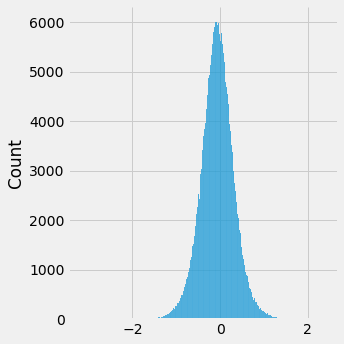

In [8]:
i = 42 # we'll look at this component

x = [] # this will be a list of all 400,000 values, one for each word in the vocabulary
for w in vocab:
    x.append(glove[w][i])

ax = sbn.displot(x)
np.mean(x)

### 2. Generate a scatter plot

Now, generate a scatter plot of a few <i>pairs</i> of components. For example, you could extract the first and second components of all the embedding vectors. What do you see? Describe the distributions of points. Do they look random?


In [9]:
# Your code and markdown go here


### 4. Exploring analogies

Now we'll explore how analogies are "solved" using the embeddings. Here is the canonical example


In [10]:
type(glove)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [11]:
glove.most_similar(positive=['king', 'woman'], negative=['man'], topn=3)

[('queen', 0.7698540687561035),
 ('monarch', 0.6843381524085999),
 ('throne', 0.6755736470222473)]

In [12]:
glove.most_similar(positive=['man', 'girl'], negative=['boy'], topn=3)

[('woman', 0.8898479342460632),
 ('she', 0.7507910132408142),
 ('one', 0.73313969373703)]

In [13]:
glove.most_similar(positive=['paris', 'greenland'], negative=['france'], topn=10)

[('nuuk', 0.6327579021453857),
 ('reykjavik', 0.6044250726699829),
 ('arctic', 0.5989606380462646),
 ('halifax', 0.5526241660118103),
 ('reykjavík', 0.5445700287818909),
 ('corfu', 0.5295721292495728),
 ('ithaca', 0.5254415273666382),
 ('antarctica', 0.5204190015792847),
 ('scotia', 0.5169051885604858),
 ('polar', 0.5107458829879761)]


Now choose at least five analogies. Which of the analogies do the models "get right"? Which are clearly wrong? Describe your findings and speculate on some reasons that the model might miss some of the analogies.



In [14]:
glove.most_similar(positive=['paris', 'greenland'], negative=['france'], topn=10)
glove.most_similar(positive=['puppy', 'cat'], negative = ['dog'])

[('puppies', 0.6867595911026001),
 ('kitten', 0.6866798400878906),
 ('kittens', 0.6383703947067261),
 ('monkey', 0.6171091198921204),
 ('rabbit', 0.6136822700500488),
 ('pup', 0.6054644584655762),
 ('tabby', 0.5937005877494812),
 ('retriever', 0.5934329032897949),
 ('bitch', 0.5817775726318359),
 ('hound', 0.5778555870056152)]